## References:
*   [Predicting Yield Curves](https://colab.research.google.com/drive/1-3qRH14a9Ft0o7QY26o-W_VFr3c2mxq5?usp=sharing#scrollTo=cRMr2Ho9vGbZ)
*   [Investor Risk Tolerance Prediction](https://colab.research.google.com/drive/1vqr48ZVTkAUG6Vbop6yzMWS0vKTzmsV3?usp=sharing#scrollTo=7h6bv-j_v-G-)
*[Medical Insurance Cost with Linear Regression](https://www.kaggle.com/code/mariapushkareva/medical-insurance-cost-with-linear-regression)
*[One Hot Encoding - everything you need to know](https://www.kaggle.com/code/marcinrutecki/one-hot-encoding-everything-you-need-to-know)
*[PyCaret Regression Tutorial](https://colab.research.google.com/github/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Regression.ipynb#scrollTo=e05937f5)


# **1. Problem**
To develop and compare six different machine learning regression models to predict clients insurance charges by performing an EDA, then preprocessing the data, then build the models, and finally explaining the outputs.

# **2. Loading libraries and dataset**

> **2.1 Loading Libraries**



In [ ]:
#!pip install pycaret
#Please install pycaret again if It doen not work
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from pycaret.regression import (
    setup,
    compare_models,
    tune_model,
    blend_models,
    stack_models,
)



> **2.2 Load Data**


In [2]:
df = pd.read_csv("https://storage.googleapis.com/public-quant/course//content/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# 3. **EDA**


> **3.1 Descriptive Statistics**


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe().round(3)

,age,bmi,children,charges
count,1338.000,1338.000,1338.000,1338.000
mean,39.207,30.663,1.095,13270.422
std,14.050,6.098,1.205,12110.011
min,18.000,15.960,0.000,1121.874
25%,27.000,26.296,0.000,4740.287
50%,39.000,30.400,1.000,9382.033
75%,51.000,34.694,2.000,16639.913
max,64.000,53.130,5.000,63770.428


In [5]:
df[["sex", "smoker"]].value_counts()

sex     smoker
female  no        547
male    no        517
        yes       159
female  yes       115
dtype: int64

In [6]:
df[["sex", "smoker", "region"]].value_counts()

sex     smoker  region   
female  no      southwest    141
                southeast    139
                northwest    135
male    no      southeast    134
female  no      northeast    132
male    no      northwest    132
                southwest    126
                northeast    125
        yes     southeast     55
                northeast     38
                southwest     37
female  yes     southeast     36
                northeast     29
                northwest     29
male    yes     northwest     29
female  yes     southwest     21
dtype: int64



> **3.2 Data Visualization**



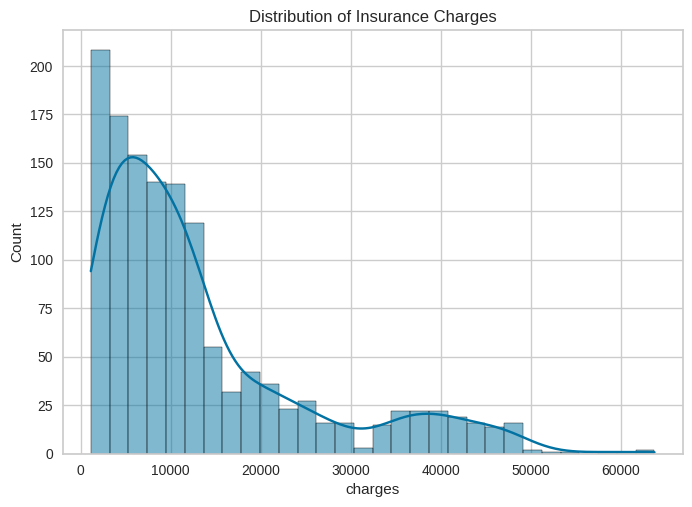

In [7]:
# Visualize the distribution of the target variable
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Insurance Charges')
plt.show()

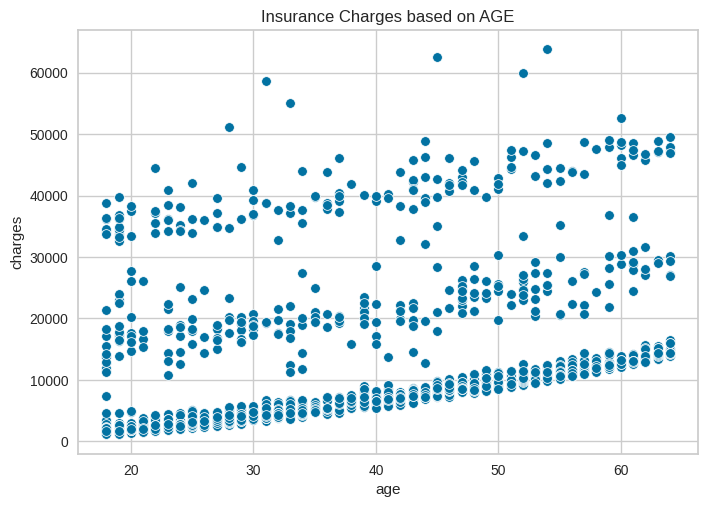

In [8]:
sns.scatterplot(x="age", y="charges", data=df)
plt.title('Insurance Charges based on AGE')
plt.show()

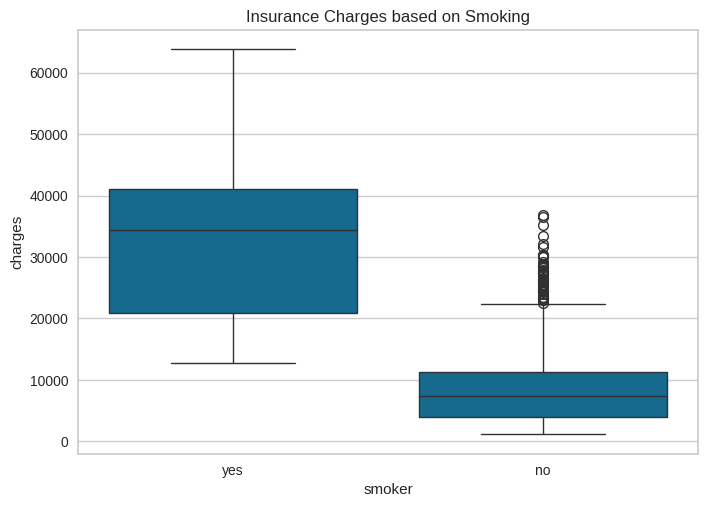

In [9]:
sns.boxplot(x="smoker", y="charges", data=df)
plt.title('Insurance Charges based on Smoking')
plt.show()

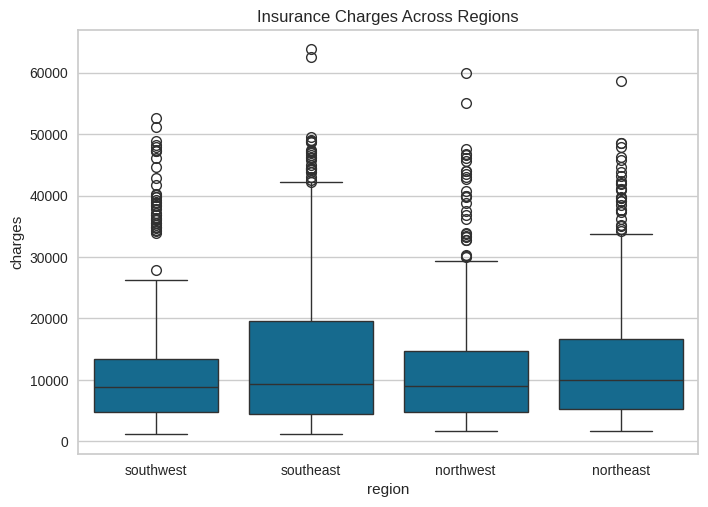

In [10]:
# Boxplot to visualize the distribution of charges across regions
sns.boxplot(x='region', y='charges', data=df)
plt.title('Insurance Charges Across Regions')
plt.show()

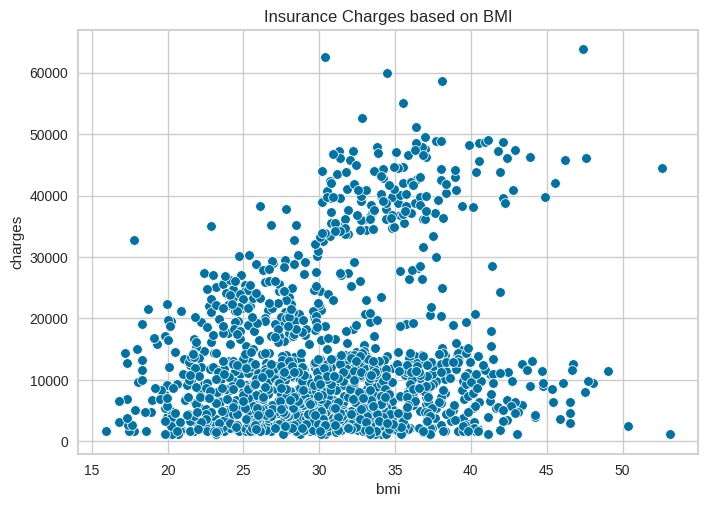

In [11]:
sns.scatterplot(x="bmi", y="charges", data=df)
plt.title('Insurance Charges based on BMI')
plt.show()

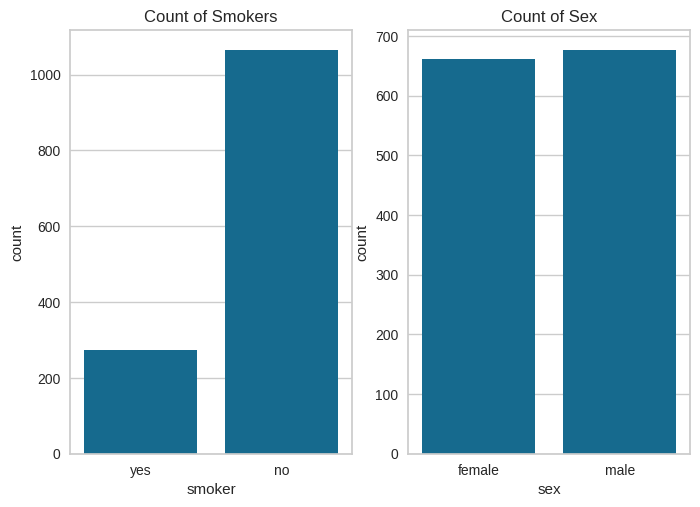

In [12]:
# Countplot for smoker and sex
plt.subplot(1, 2, 1)
sns.countplot(x='smoker', data=df)
plt.title('Count of Smokers')

plt.subplot(1, 2, 2)
sns.countplot(x='sex', data=df)
plt.title('Count of Sex')
plt.show()

Some Inforamtion Gathered from this:


*   Increaasing age brings higher insurance
*   Non-Smokers have lower insurance charge than smokers
*   There are more non-smokers than smokers in the dataset, and the distribution of sexes is roughly balanced.



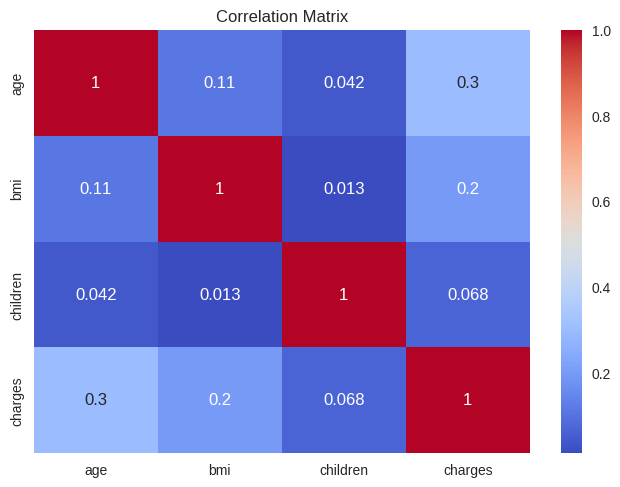

In [13]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

This correlation matrix does not provide us with enough information.

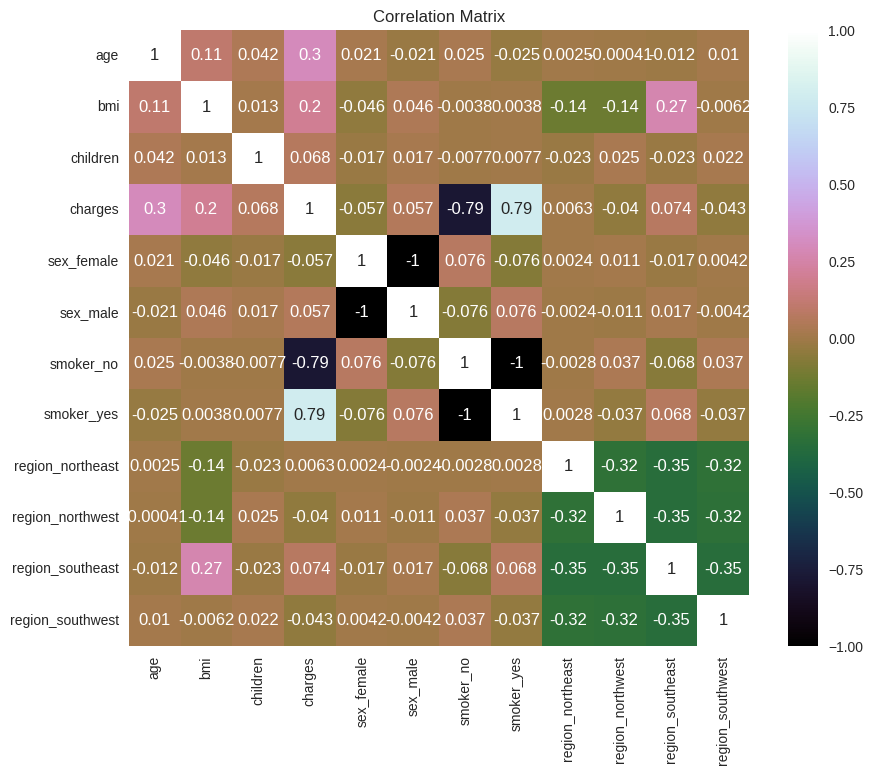

In [14]:
correlation_matrix = pd.get_dummies(df, columns=['sex', 'smoker', 'region']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='cubehelix')
plt.title('Correlation Matrix')
plt.show()

The key takeaway here is that smoking exhibits a significant positive correlation with healthcare charges. This association is observed across age and BMI as well, though smoking appears to have a notably stronger impact.

<Figure size 1500x1500 with 0 Axes>

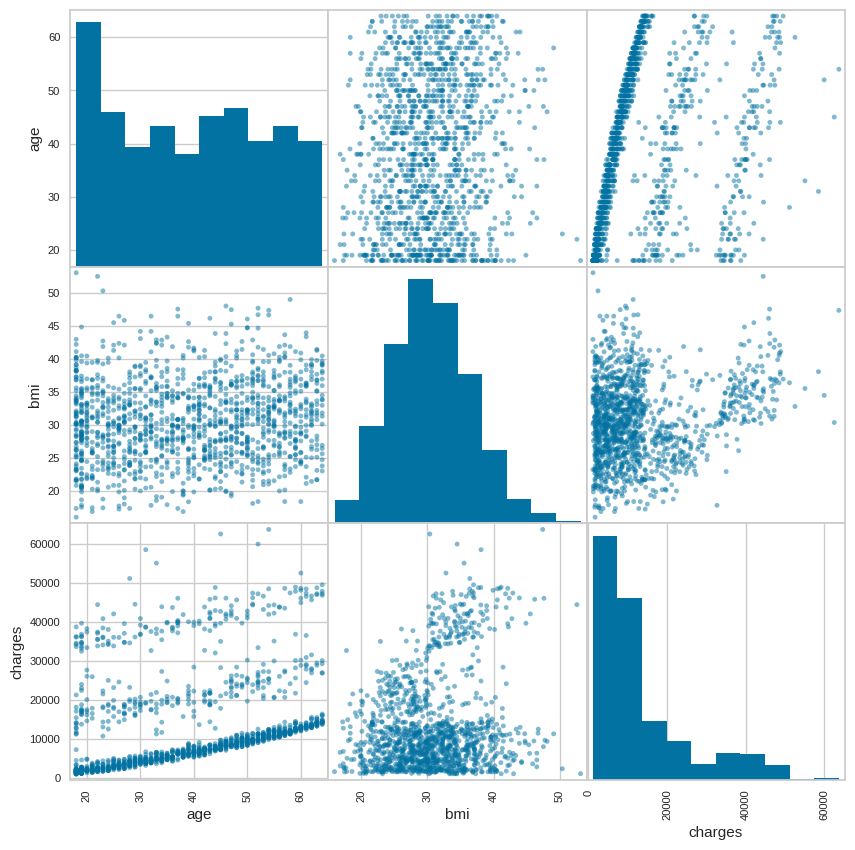

In [15]:
plt.figure(figsize=(15, 15))
pd.plotting.scatter_matrix(frame=df[["age", "bmi", "charges"]], figsize=(10, 10))
plt.show()



> **3.3 What We learned from EDA**

> * Charges tend to be lower than or around 10000.
* There are a lot of young people in this dataset.(Scatter matrix top left)
* People who smoke and are older and have a higher BMI have higher charges(positive correlation with all three)
* BMI is normally distributed
* As BMI increases, variance in the charges also increases
* There are more non-smokers than smokers in the dataset, and the distribution of sexes is roughly balanced.





# **4.  Data Preparation and analysis**


> 4**.1 Train Test Split**



In [16]:
# Splitting the data into features (X) and the target variable (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)




> **4.2 Adding Variables**



In [17]:
categorical_columns = ['sex', 'smoker', 'region']

# One-hot encoding categorical variables
encoder = OneHotEncoder()
encoded_vars_train = encoder.fit_transform(X_train[categorical_columns]).toarray()
encoded_vars_test = encoder.transform(X_test[categorical_columns]).toarray()

# Scaling numerical variables
scaler = StandardScaler()
scaled_vars_train = scaler.fit_transform(X_train.drop(categorical_columns, axis=1))
scaled_vars_test = scaler.transform(X_test.drop(categorical_columns, axis=1))


In [18]:
# Transforming back to DataFrame
transformed_df_train = pd.DataFrame(
    np.concatenate([scaled_vars_train, encoded_vars_train], axis=1),
    columns=list(X_train.drop(categorical_columns, axis=1).columns) + list(encoder.get_feature_names_out())
)
transformed_df_test = pd.DataFrame(
    np.concatenate([scaled_vars_test, encoded_vars_test], axis=1),
    columns=list(X_test.drop(categorical_columns, axis=1).columns) + list(encoder.get_feature_names_out())
)

### One-hot encoding removed an index. Let's put it back:
transformed_df_train.index = X_train.index
transformed_df_test.index = X_test.index

# Joining tables
X_train = pd.concat([X_train.drop(categorical_columns, axis=1), transformed_df_train], axis=1)
X_test = pd.concat([X_test.drop(categorical_columns, axis=1), transformed_df_test], axis=1)

# Checking result for training set
X_train.head()

,age,bmi,children,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
151,48,29.700,0,0.647788,-0.171454,-0.903046,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1135,50,28.120,3,0.792670,-0.428775,1.627645,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
462,62,38.095,2,1.661959,1.195770,0.784082,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
630,53,36.100,1,1.009992,0.870861,-0.059482,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1230,52,34.485,3,0.937551,0.607840,1.627645,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [19]:
#to remove the column confusion, I renamed them
X_train.columns = ['age',	'bmi', 'children',	'age_scaled',	'bmi_scaled',	'children_scaled',	'female',	'male',	'non-smoker',	'smoker',	'northeast',	'northwest',	'southeast',	'southwest']

In [20]:
X_test.columns = ['age',	'bmi', 'children',	'age_scaled',	'bmi_scaled',	'children_scaled',	'female',	'male',	'non-smoker',	'smoker',	'northeast',	'northwest',	'southeast',	'southwest']

# 5. Evaluate Algorithms and Models


> **5.1 Finding best models**


In [21]:
reg_experiment = setup(data=df, target="charges",  categorical_features=["sex", "smoker", "region"])
best = compare_models(n_select=6)
# tune models
tune = [tune_model(i) for i in best]

# stack models
stacker = stack_models(estimator_list=best)

# blend models
blender = blend_models(estimator_list=best)


,Description,Value
0,Session id,6538
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2712.9403,23373833.6959,4757.4276,0.8437,0.4344,0.3114,0.1820
lightgbm,Light Gradient Boosting Machine,2971.8997,24743088.2589,4924.0701,0.8321,0.5119,0.3532,0.5010
rf,Random Forest Regressor,2860.2626,25071463.7228,4959.4422,0.8294,0.4529,0.3220,0.7220
et,Extra Trees Regressor,2784.4480,27161396.1741,5159.6821,0.8151,0.4627,0.3039,0.3810
ada,AdaBoost Regressor,4092.2813,27295943.1524,5192.1189,0.8142,0.5883,0.6474,0.1070
xgboost,Extreme Gradient Boosting,3302.3896,30615867.8000,5491.9935,0.7901,0.5770,0.4157,0.1520
ridge,Ridge Regression,4324.8863,38012201.6787,6131.8365,0.7398,0.6063,0.4520,0.2760
br,Bayesian Ridge,4318.2022,38013250.7743,6132.1928,0.7397,0.5987,0.4508,0.3210
lar,Least Angle Regression,4311.0802,38013594.5215,6132.5027,0.7396,0.5952,0.4496,0.3440
llar,Lasso Least Angle Regression,4311.2985,38013660.4270,6132.4632,0.7396,0.5957,0.4497,0.2790


Processing:   0%|          | 0/86 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3148.8761,26512620.4085,5149.0407,0.8594,0.4976,0.3555
1,3569.8209,36100056.2350,6008.3322,0.7082,0.5558,0.3949
2,3489.2587,36963195.7981,6079.7365,0.7969,0.4777,0.3070
3,2925.5113,23246785.9218,4821.4921,0.8498,0.4514,0.3482
4,3125.8189,31226544.4638,5588.0716,0.8369,0.4558,0.3245
5,2694.8147,21192500.6966,4603.5313,0.8133,0.4713,0.2744
6,3182.0341,27911020.4250,5283.0882,0.8423,0.4391,0.3745
7,2175.4022,11973652.7794,3460.2966,0.8850,0.3907,0.3123
8,2682.8584,17499962.1968,4183.2956,0.8229,0.3990,0.3278


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3103.4521,25604671.0641,5060.1058,0.8642,0.5186,0.3550
1,3335.5542,34282417.1850,5855.1189,0.7229,0.5450,0.3649
2,3405.3076,35615227.7657,5967.8495,0.8043,0.5346,0.3347
3,3088.3191,23539951.6076,4851.7988,0.8479,0.5066,0.3822
4,3025.2129,27858228.6913,5278.0895,0.8545,0.4104,0.3127
5,2762.3039,20109728.6368,4484.3872,0.8228,0.5303,0.2927
6,3080.6285,26328613.9289,5131.1416,0.8512,0.4485,0.3629
7,2329.6727,12792922.9153,3576.7196,0.8771,0.4648,0.3339
8,2768.2022,16178026.0373,4022.1917,0.8363,0.4583,0.3806


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2854.9183,21779338.3118,4666.8339,0.8845,0.4372,0.3219
1,3088.0647,30648356.3619,5536.0958,0.7522,0.4870,0.3396
2,2853.0898,31279505.6162,5592.8084,0.8282,0.4495,0.2506
3,2607.0687,21566567.4824,4643.9819,0.8607,0.4140,0.2872
4,2832.1320,28818855.9413,5368.3197,0.8495,0.4039,0.2737
5,2560.2656,20451507.8366,4522.3343,0.8198,0.4623,0.2618
6,2846.3510,24278596.4324,4927.3316,0.8628,0.3870,0.3100
7,2118.7622,11571032.2485,3401.6220,0.8888,0.3361,0.2673
8,2313.8470,14261202.9638,3776.4008,0.8557,0.3378,0.2758


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2186.7621,23641285.0521,4862.2305,0.8747,0.4033,0.1217
1,2479.5943,32253809.2555,5679.2437,0.7393,0.4578,0.1488
2,2343.0283,34401056.7675,5865.2414,0.8110,0.4758,0.1094
3,1850.2362,23423356.5326,4839.7682,0.8487,0.4237,0.1091
4,2179.2979,31153679.9666,5581.5482,0.8373,0.3438,0.1040
5,1839.4978,20987337.2993,4581.1939,0.8151,0.4701,0.1112
6,1909.7193,23224105.0833,4819.1395,0.8688,0.2754,0.1000
7,1376.0345,11120120.2605,3334.6844,0.8932,0.2850,0.0959
8,1591.9835,15249362.1376,3905.0432,0.8457,0.2899,0.1214


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3180.7065,23016960.4863,4797.5995,0.8780,0.4827,0.4129
1,3285.6086,30233315.1141,5498.4830,0.7556,0.5119,0.4058
2,3151.8903,31712116.9670,5631.3513,0.8258,0.4826,0.3411
3,2999.3235,25343449.2601,5034.2278,0.8363,0.5213,0.3908
4,3099.9232,31855587.1167,5644.0754,0.8336,0.4764,0.3653
5,2787.6865,21743237.0210,4662.9644,0.8084,0.5048,0.3344
6,2844.6347,22611369.2080,4755.1413,0.8722,0.4420,0.3800
7,2504.6611,13197999.4751,3632.9051,0.8732,0.4159,0.3695
8,2350.5549,13459520.1303,3668.7219,0.8638,0.4000,0.3392


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2926.7307,26736864.0000,5170.7700,0.8582,0.4736,0.2818
1,3483.1501,39593648.0000,6292.3481,0.6799,0.5931,0.4633
2,3407.4658,40017864.0000,6325.9673,0.7802,0.5428,0.3409
3,3307.6433,29016164.0000,5386.6655,0.8126,0.5009,0.4101
4,2793.8574,29141800.0000,5398.3145,0.8478,0.4056,0.2760
5,2797.3545,23471752.0000,4844.7656,0.7932,0.4523,0.2707
6,3234.8511,30372732.0000,5511.1460,0.8284,0.4519,0.3753
7,2255.0942,15517034.0000,3939.1667,0.8509,0.4153,0.2807
8,2853.4797,23327468.0000,4829.8516,0.7640,0.4280,0.3621


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2843.7262,22883158.8760,4783.6345,0.8787,0.4487,0.3257
1,3106.2449,32160475.3285,5671.0207,0.7400,0.5098,0.3516
2,3349.2188,35224300.4185,5935.0064,0.8065,0.4934,0.3087
3,2450.8708,21090993.8566,4592.4932,0.8638,0.4253,0.2771
4,2743.1644,30028061.4111,5479.7866,0.8432,0.4133,0.2737
5,2535.7093,18299839.9676,4277.8312,0.8388,0.4278,0.2612
6,2891.4307,24886536.3709,4988.6407,0.8594,0.3951,0.3158
7,2038.5117,10122462.4820,3181.5818,0.9027,0.3549,0.2918
8,2297.3674,13745595.3161,3707.5053,0.8609,0.3622,0.2985


Processing:   0%|          | 0/6 [00:00<?, ?it/s]


> **5.2 Comparision of models**

>  I will be using 6 models:
>*   Gradient Boosting Regressor
*   Random Forest Regressor
* Extra Trees Regressor
* AdaBoost Regressor
* Light Gradient Boosting Machine
* Ridge Regression

> Comparing these models below



In [22]:
num_folds = 10
scoring = 'neg_mean_squared_error'
kfold_results = []
names = []
validation_results = []
train_results = []
models = []
models.append(("GBR", GradientBoostingRegressor()))
models.append(("LIGHTGBM", LGBMRegressor(verbose=-1)))
models.append(("RF", RandomForestRegressor()))
models.append(("ADA", AdaBoostRegressor()))
models.append(("ET", ExtraTreesRegressor()))
models.append(("RIDGE", Ridge()))

In [23]:
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    names.append(name)

    # Finally we Train on the full period and test against validation
    res = model.fit(X_train, y_train)
    validation_result = np.mean(np.square(res.predict(X_test) - y_test))
    validation_results.append(validation_result)
    train_result = np.mean(np.square(res.predict(X_train) - y_train))
    train_results.append(train_result)

    msg = "%s: \nAverage CV error: %s \nStd CV Error: (%s) \nTraining Error:\n%s \nTest Error:\n%s" % \
    (name, str(cv_results.mean()), str(cv_results.std()), str(train_result), str(validation_result))
    print(msg)
    print('----------')


GBR: 
Average CV error: 21467996.05803423 
Std CV Error: (9741547.014681788) 
Training Error:
13530633.039029496 
Test Error:
22227129.323951147
----------
LIGHTGBM: 
Average CV error: 23599934.9074215 
Std CV Error: (9202626.680753175) 
Training Error:
7880850.9863977665 
Test Error:
24751277.042224742
----------
RF: 
Average CV error: 23991438.70152118 
Std CV Error: (9754334.062649947) 
Training Error:
3375574.2947769044 
Test Error:
26353878.507270053
----------
ADA: 
Average CV error: 26863992.08555519 
Std CV Error: (8761300.341831386) 
Training Error:
23389542.049558688 
Test Error:
26241295.724952005
----------
ET: 
Average CV error: 27221698.077255316 
Std CV Error: (9518051.04280249) 
Training Error:
5.84843260507859e-22 
Test Error:
31354511.762384124
----------
RIDGE: 
Average CV error: 37948640.12344253 
Std CV Error: (13075674.97522889) 
Training Error:
36936828.35610557 
Test Error:
35842842.532585755
----------


Commparing the Algorithms

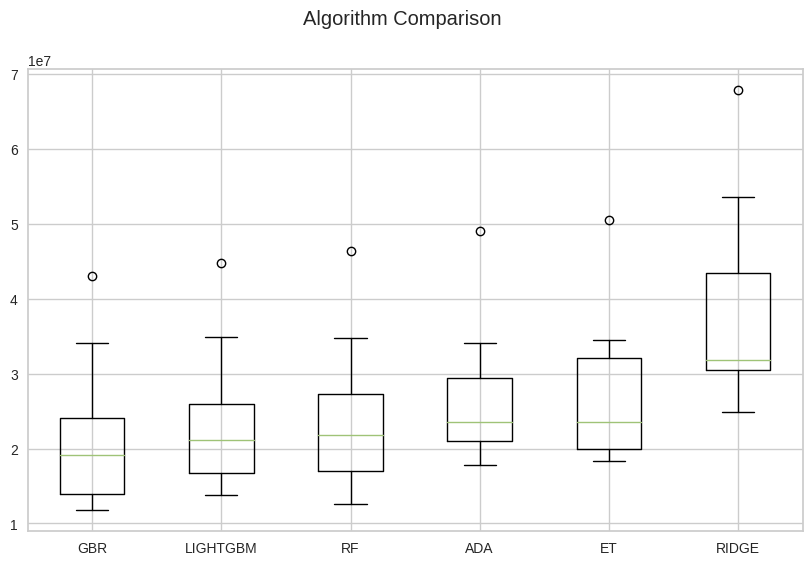

In [24]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(10,6)
plt.show()

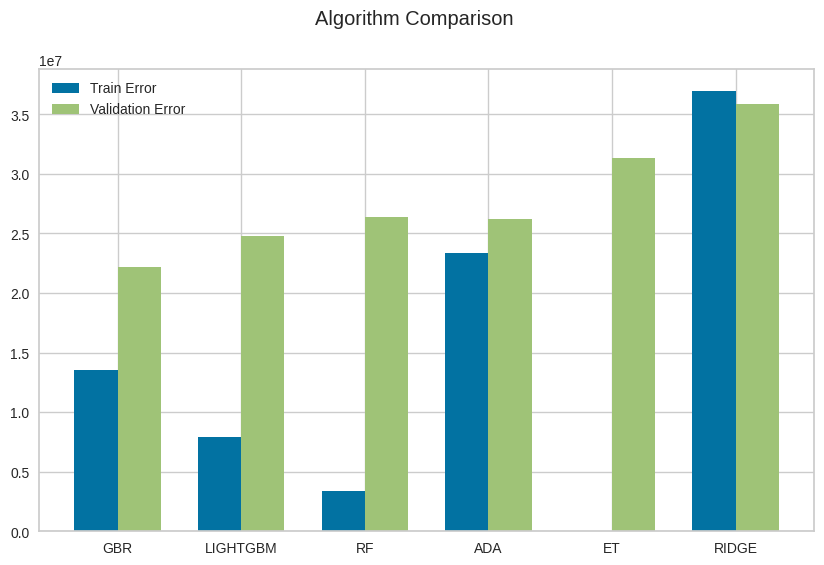

In [25]:
# compare algorithms
fig = plt.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.bar(ind - width/2, [x.mean() for x in train_results],  width=width, label='Train Error')
plt.bar(ind + width/2, [x.mean() for x in validation_results], width=width, label='Validation Error')
fig.set_size_inches(10,6)
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
plt.show()

Some more information:

Gradient Boosting Regressor (GBR):
Description: Gradient Boosting Regressor is an ensemble learning technique that builds multiple decision trees sequentially, where each tree corrects the errors of the previous one. It minimizes a loss function, typically the mean squared error.
Advantages: GBR can capture complex relationships in the data and handle both numerical and categorical features effectively. It tends to provide high predictive accuracy.
Disadvantages: GBR can be prone to overfitting, especially with large and noisy datasets. It can also be computationally expensive and sensitive to hyperparameters.
But why would GBR be better. First, GBR employs an ensemble approach by utilizing a collection of weak learners to construct a stronger learner, rendering it adept at generalization, particularly in scenarios involving outliers, which are frequently encountered in insurance data.

Random Forest Regressor:
Description: Random Forest Regressor is an ensemble learning method that builds multiple decision trees and aggregates their predictions to improve accuracy and reduce overfitting.
Advantages: Random Forest is robust to overfitting and noise in the data. It can handle large datasets with high-dimensional feature spaces. It also provides estimates of feature importance.
Disadvantages: Random Forest may not capture complex interactions between features as effectively as other models like Gradient Boosting. It can also be computationally expensive for training on large datasets.

Extra Trees Regressor:
Description: Extra Trees Regressor is similar to Random Forest but with some differences in the way trees are built. It selects random features at each split and uses random thresholds to split nodes.
Advantages: Extra Trees can reduce variance compared to Random Forest by introducing additional randomness. It is less sensitive to noisy features and can be faster to train.
Disadvantages: Extra Trees may not perform as well as Random Forest when there are strong interactions between features. It may also be harder to interpret the importance of features.


AdaBoost Regressor:
Description: AdaBoost Regressor is an ensemble learning method that combines multiple weak learners (e.g., decision trees) to create a strong learner. It adjusts the weights of incorrectly predicted instances to focus on difficult cases.
Advantages: AdaBoost is robust to overfitting and can handle high-dimensional data well. It tends to provide good generalization performance.
Disadvantages: AdaBoost may be sensitive to noisy data and outliers. It can also be affected by the choice of base estimator.


Light Gradient Boosting Machine (LightGBM):Description:  It uses a histogram-based algorithm to speed up training and can handle large datasets efficiently.
Advantages: LightGBM is highly scalable and can handle large datasets with millions of instances and features. It provides faster training speed and lower memory usage compared to other gradient boosting implementations.
Disadvantages: LightGBM may require careful tuning of hyperparameters to prevent overfitting, especially on smaller datasets. It may also be less interpretable than traditional decision tree-based models.


Ridge Regression
Description: Ridge Regression is a linear regression technique that adds a penalty term (L2 regularization) to the loss function to prevent overfitting. It shrinks the coefficients of less important features towards zero.
Advantages: Ridge Regression can handle multicollinearity in the data and reduce the impact of irrelevant features. It provides stable and interpretable coefficients.
Disadvantages: Ridge Regression may not perform well if the relationship between features and the target variable is highly non-linear. It may also struggle with high-dimensional data if the number of features exceeds the number of instances.


# 6. Model Tuning and Grid Search


> Given GBM is our model for the approach, we perform gridsearch



In [26]:
param_grid = {'n_estimators': [50,100,150,200,250,300,350,400]}
model = GradientBoostingRegressor()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -21207921.790576 using {'n_estimators': 50}
-21207921.790576 (10377601.457925) with: {'n_estimators': 50}
-21529038.262655 (9763412.574443) with: {'n_estimators': 100}
-22478703.075390 (9214968.149748) with: {'n_estimators': 150}
-23116278.628583 (8955925.226854) with: {'n_estimators': 200}
-23679402.132565 (8872857.662939) with: {'n_estimators': 250}
-24233672.611360 (8665656.547103) with: {'n_estimators': 300}
-24694396.002457 (8904206.733670) with: {'n_estimators': 350}
-25371803.177898 (8541587.445518) with: {'n_estimators': 400}


# 7 Finalise the Model


###> 7.1 Results on the Test Dataset



In [27]:
#50 has lower error and a higher r^2
# estimate accuracy on validation set
# transform the validation dataset
model = GradientBoostingRegressor(n_estimators=50)
model.fit(X_train, y_train)
predictions_train = model.predict(X_train)
print(r2_score(y_train, predictions_train))
predictions = model.predict(X_test)
print(mean_squared_error(y_test, predictions))
print(r2_score(y_test, predictions))

0.8899949965213083
21324869.077757332
0.8553751829284966




###  **7.2 Results**



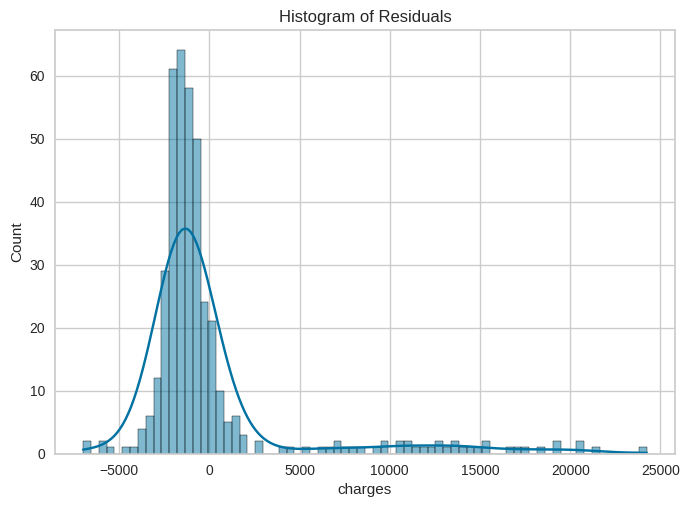

In [28]:
sns.histplot(y_test- predictions, kde=True)
plt.title("Histogram of Residuals")
plt.show()

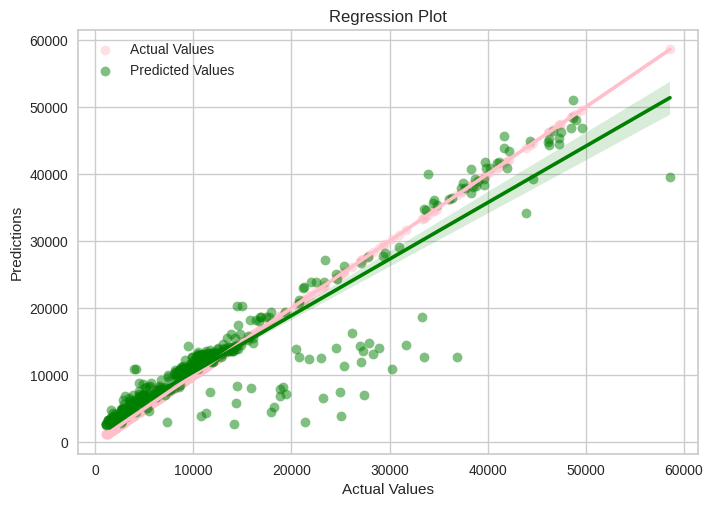

In [29]:
sns.regplot(x=y_test, y=y_test, color='pink', scatter_kws={'s': 50, 'alpha': 0.5}, label='Actual Values')
sns.regplot(x=y_test, y=predictions, color='green', scatter_kws={'s': 50, 'alpha': 0.5}, label='Predicted Values')
plt.xlabel("Actual Values")
plt.ylabel("Predictions")
plt.title("Regression Plot")
plt.legend()
plt.show()

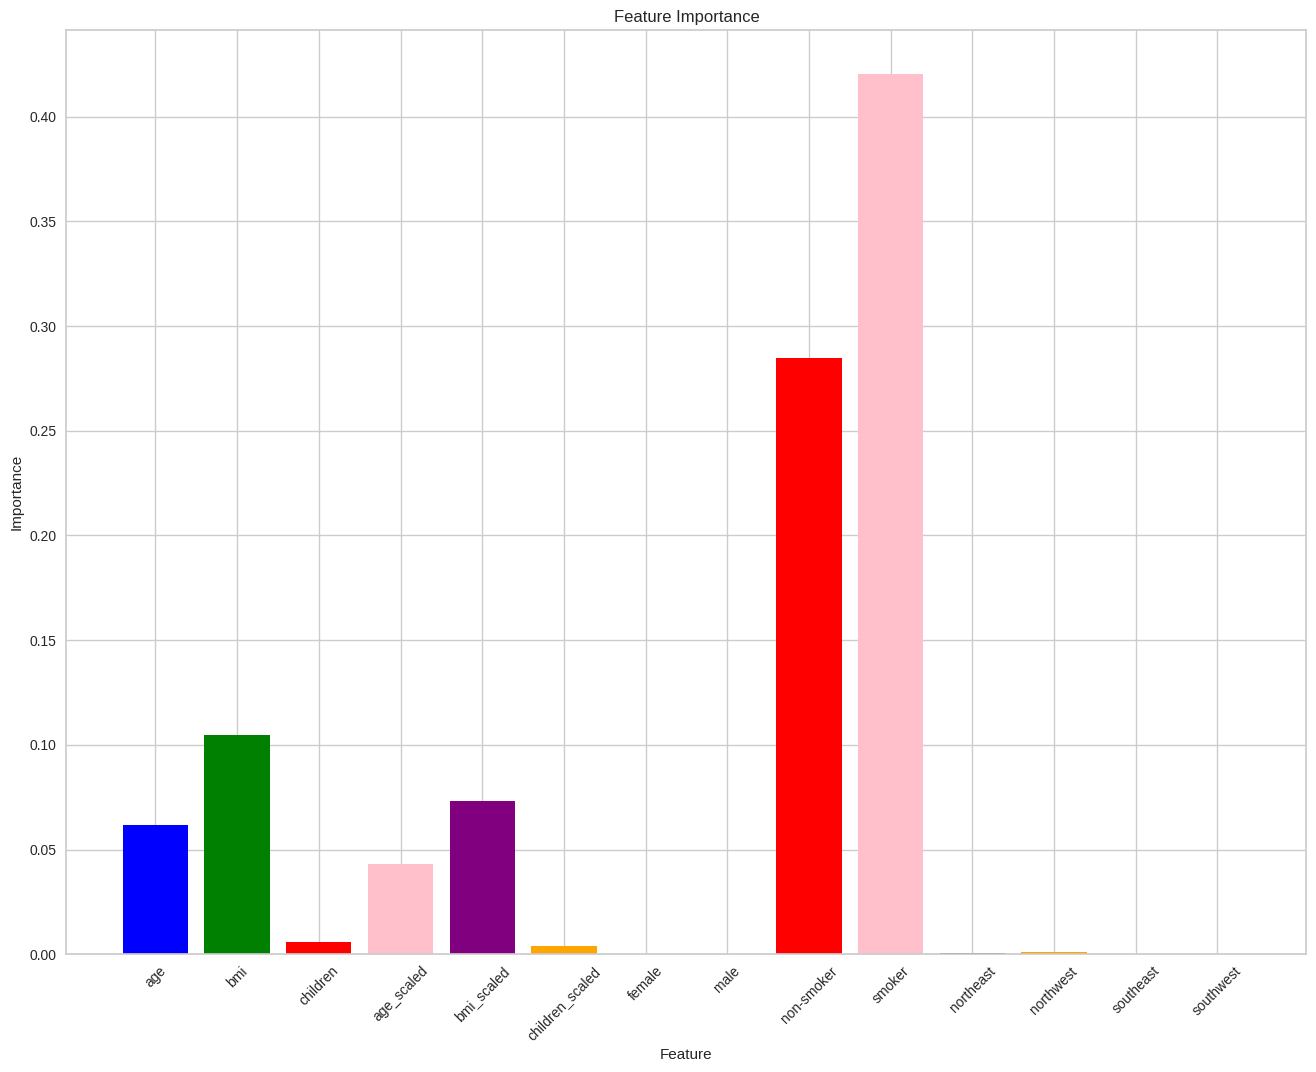

In [30]:
importance = model.feature_importances_
plt.subplots(figsize=(16, 12))
colors = ['blue', 'green', 'red', 'pink', 'purple', 'orange']
plt.bar(model.feature_names_in_, importance, color = colors)
plt.xticks(rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

Final remarks: After looking at the graphs you can look that residuals show normal distribution with a long tail which can indicate some other factors are in play which models did not account for. The regression plot shows the predicted vs actual values. you can see that the model is doing well (lot of point in x=y region) with some outsiders. The bar gragh shows that smoking holds the most importance for your insurance costs the second is non smoking. This is much more that the BMI and age and regions have almost no effect on the charges. So Do not smoke it will increase your health insurance like crazy.